### DSC 630 - 1.2 Assignment Python/R Refresher ###

### About Data Set ###
#### Occupational Employment and Wage Statistics from US Bureau of Labor Statistics ##
#### The Occupational Employment and Wage Statistics (OEWS) program conducts a semiannual survey designed to produce estimates of employment and wages for specific occupations. 
#### The OEWS program collects data on wage and salary workers in nonfarm establishments in order to produce employment and wage estimates for about 800 occupations. 
#### Data from self-employed persons are not collected and are not included in the estimates. 

### Answers i want to seek from this data
#### 1.Largest Occupation at national level
#### 2.Occupation with highest annual wages

In [25]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import openpyxl
import plotly.express as px

In [26]:
#Read the data file
wages_df = pd.read_excel('C:/Users/Supraja/Desktop/Supraja WORK Apps/7.DSC630/Assignments/national_M2020_dl.xlsx', engine='openpyxl')
wages_df.head(10)

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,...,20.17,32.41,50.99,22810,29020,41950,67410,106050,NaN,NaN
1,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,...,52.77,76.71,#,51670,74250,109760,159550,#,NaN,NaN
2,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,11-1000,Top Executives,...,51.05,80.73,#,44530,67740,106180,167930,#,NaN,NaN
3,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,11-1010,Chief Executives,...,89.4,#,#,62780,114530,185950,#,#,NaN,NaN
4,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,11-1011,Chief Executives,...,89.4,#,#,62780,114530,185950,#,#,NaN,NaN
5,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,11-1020,General and Operations Managers,...,49.83,77.49,#,45850,67450,103650,161190,#,NaN,NaN
6,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,11-1021,General and Operations Managers,...,49.83,77.49,#,45850,67450,103650,161190,#,NaN,NaN
7,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,11-1030,Legislators,...,*,*,*,18120,19790,33200,83780,105100,True,NaN
8,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,11-1031,Legislators,...,*,*,*,18120,19790,33200,83780,105100,True,NaN
9,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,11-2000,"Advertising, Marketing, Promotions, Public Rel...",...,64.48,89.26,#,67480,93540,134120,185660,#,NaN,NaN


In [27]:
#Convert object types to numeric for TOT_EMP and A_MEAN attributes
wages_df['TOT_EMP'] = pd.to_numeric(wages_df['TOT_EMP'],errors='coerce').astype('Int64')
wages_df['A_MEAN'] = pd.to_numeric(wages_df['A_MEAN'],errors='coerce').astype('Int64')
wages_df.columns

Index(['AREA', 'AREA_TITLE', 'AREA_TYPE', 'PRIM_STATE', 'NAICS', 'NAICS_TITLE',
       'I_GROUP', 'OWN_CODE', 'OCC_CODE', 'OCC_TITLE', 'O_GROUP', 'TOT_EMP',
       'EMP_PRSE', 'JOBS_1000', 'LOC_QUOTIENT', 'PCT_TOTAL', 'H_MEAN',
       'A_MEAN', 'MEAN_PRSE', 'H_PCT10', 'H_PCT25', 'H_MEDIAN', 'H_PCT75',
       'H_PCT90', 'A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90',
       'ANNUAL', 'HOURLY'],
      dtype='object')

In [44]:
#Create a dataframe only with required attributes
wages_new=wages_df[['PRIM_STATE','OCC_TITLE','O_GROUP','TOT_EMP','A_MEAN','LOC_QUOTIENT','A_PCT90']]
wages_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1329 entries, 0 to 1328
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PRIM_STATE    1329 non-null   object 
 1   OCC_TITLE     1329 non-null   object 
 2   O_GROUP       1329 non-null   object 
 3   TOT_EMP       1328 non-null   Int64  
 4   A_MEAN        1323 non-null   Int64  
 5   LOC_QUOTIENT  0 non-null      float64
 6   A_PCT90       1329 non-null   object 
dtypes: Int64(2), float64(1), object(4)
memory usage: 75.4+ KB


In [45]:
#Filter the table to contain only National level data
wagesnew2=wages_new[wages_new['PRIM_STATE'].str.contains("US")].reset_index(drop=True)
wagesnew2

,PRIM_STATE,OCC_TITLE,O_GROUP,TOT_EMP,A_MEAN,LOC_QUOTIENT,A_PCT90
0,US,All Occupations,total,139099570,56310,NaN,106050
1,US,Management Occupations,major,7947300,126480,NaN,#
2,US,Top Executives,minor,2601070,129920,NaN,#
3,US,Chief Executives,broad,202360,197840,NaN,#
4,US,Chief Executives,detailed,202360,197840,NaN,#
...,...,...,...,...,...,...,...
1324,US,Refuse and Recyclable Material Collectors,detailed,120850,42620,NaN,67530
1325,US,"Tank Car, Truck, and Ship Loaders",broad,12610,50670,NaN,79220
1326,US,"Tank Car, Truck, and Ship Loaders",detailed,12610,50670,NaN,79220
1327,US,Miscellaneous Material Moving Workers,broad,26300,37770,NaN,59550


In [56]:
#Filter the table to contain only broad data available
wageMajor=wagesnew2[wagesnew2['O_GROUP'].str.contains("broad")].reset_index(drop=True)
wageMajor

,PRIM_STATE,OCC_TITLE,O_GROUP,TOT_EMP,A_MEAN,LOC_QUOTIENT,A_PCT90
0,US,Chief Executives,broad,202360,197840,NaN,#
1,US,General and Operations Managers,broad,2347420,125740,NaN,#
2,US,Legislators,broad,51290,53560,NaN,105100
3,US,Advertising and Promotions Managers,broad,22490,147560,NaN,#
4,US,Marketing and Sales Managers,broad,660380,150400,NaN,#
...,...,...,...,...,...,...,...
420,US,Laborers and Material Movers,broad,6021330,32040,NaN,45440
421,US,Pumping Station Operators,broad,26430,57500,NaN,84270
422,US,Refuse and Recyclable Material Collectors,broad,120850,42620,NaN,67530
423,US,"Tank Car, Truck, and Ship Loaders",broad,12610,50670,NaN,79220


### 1.Largest Occupation at national level

Text(0, 0.5, 'Occupation Category Title')

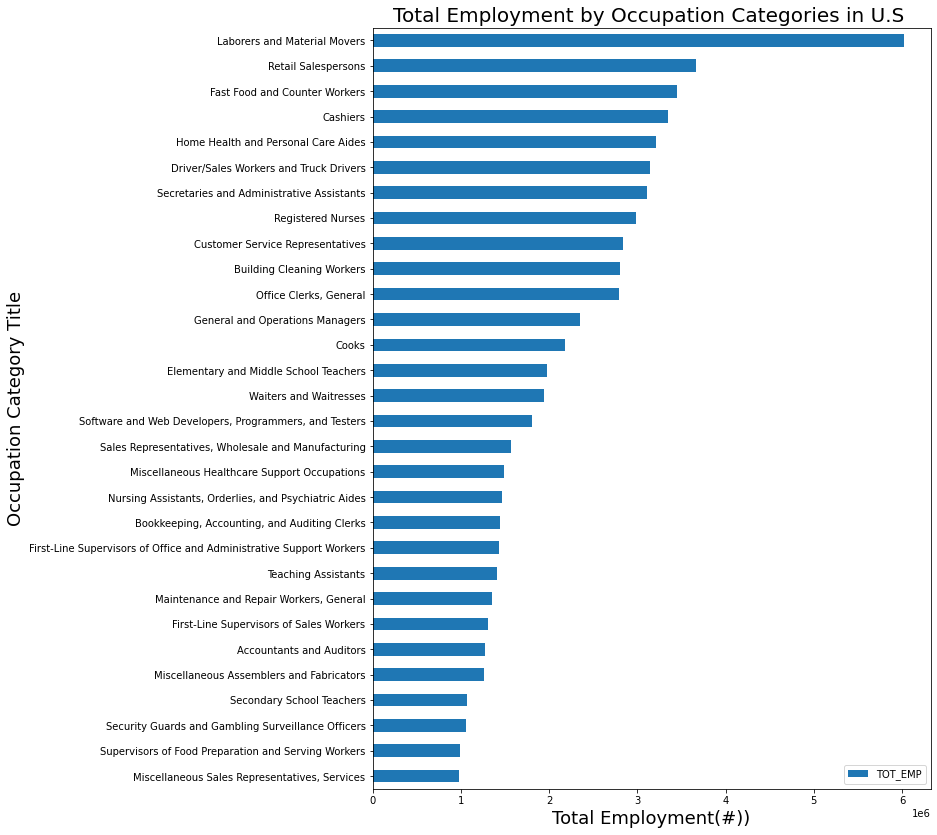

In [57]:
topemployment = wageMajor.sort_values(by="TOT_EMP",ascending = False).head(30)
topemployment[['OCC_TITLE','TOT_EMP']].sort_values(by='TOT_EMP',ascending = True).plot(x = 'OCC_TITLE',kind = 'barh',figsize=(10,14))
plt.title('Total Employment by Occupation Categories in U.S ',fontsize = 20)
plt.xlabel('Total Employment(#))',fontsize = 18)
plt.ylabel('Occupation Category Title',fontsize = 18)

#### From the bar chart above, it is evident that there are more jobs for constructions works, restaurant staff and office and adminstrative support occupations

### 2.Occupation with highest wages

Text(0, 0.5, 'Occupation Category Title')

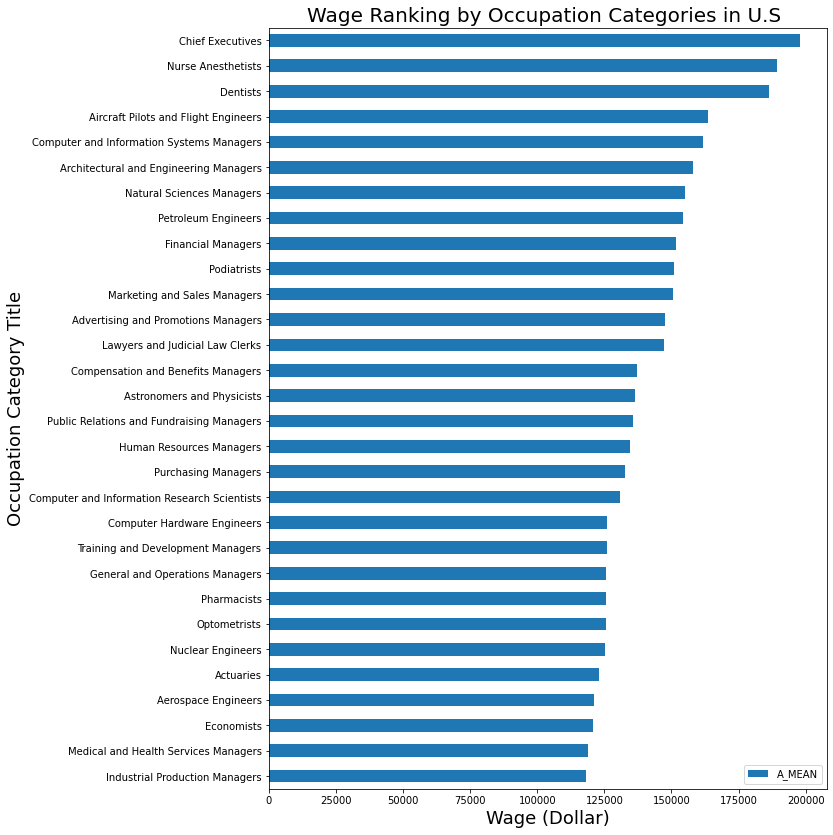

In [58]:
topAnnualMeanWage = wageMajor.sort_values(by="A_MEAN",ascending = False).head(30)
topAnnualMeanWage[['OCC_TITLE','A_MEAN']].sort_values(by='A_MEAN',ascending = True).plot(x = 'OCC_TITLE',kind = 'barh',figsize=(10,14))
plt.title('Wage Ranking by Occupation Categories in U.S ',fontsize = 20)
plt.xlabel('Wage (Dollar)',fontsize = 18)
plt.ylabel('Occupation Category Title',fontsize = 18)

#### From the above bar chart, it is evident that CEO positions, Anestheists occupations draw more annual salary than other occupations. 

In [60]:
#Filter the table to contain major data available
wageMajor=wagesnew2[wagesnew2['O_GROUP'].str.contains("major")].reset_index(drop=True)
wageMajor

,PRIM_STATE,OCC_TITLE,O_GROUP,TOT_EMP,A_MEAN,LOC_QUOTIENT,A_PCT90
0,US,Management Occupations,major,7947300,126480,NaN,#
1,US,Business and Financial Operations Occupations,major,8387490,80680,NaN,130380
2,US,Computer and Mathematical Occupations,major,4587700,96770,NaN,157120
3,US,Architecture and Engineering Occupations,major,2515040,90300,NaN,144090
4,US,"Life, Physical, and Social Science Occupations",major,1296060,79360,NaN,132370
5,US,Community and Social Service Occupations,major,2231070,52180,NaN,82450
6,US,Legal Occupations,major,1154740,112320,NaN,#
7,US,Educational Instruction and Library Occupations,major,8446910,59810,NaN,102570
8,US,"Arts, Design, Entertainment, Sports, and Media...",major,1857500,64400,NaN,113630
9,US,Healthcare Practitioners and Technical Occupat...,major,8579180,85900,NaN,148720


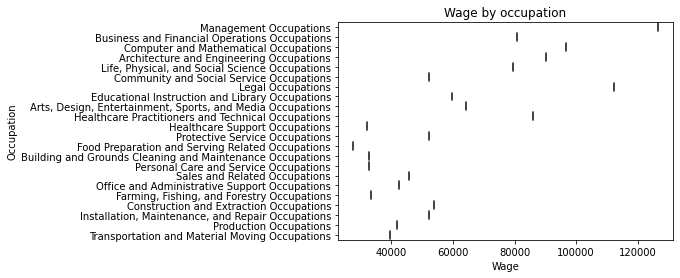

In [61]:
## Box plot
sn.boxplot(data=wageMajor, x='A_MEAN', y='OCC_TITLE')
plt.xlabel('Wage')
plt.ylabel('Occupation')
plt.title('Wage by occupation')
plt.show()

#### As expected Management and legal occupations drawing more annual salary than others.

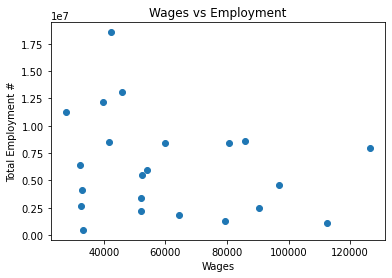

In [62]:
## Bi-variate Plot
plt.scatter(x=wageMajor['A_MEAN'], y=wageMajor['TOT_EMP'])
plt.xlabel('Wages')
plt.ylabel('Total Employment #')
plt.title('Wages vs Employment')
plt.show()

#### Majority of jobs drawing salary between 40 to 60K

### Conclusion
#### I have used Bar, Box and Scatter plots to understand the data better.
#### The bar chart was helpful to understand which occupation has more number of jobs and which occupation drawing 
#### more wages than others, the same is validated by boxplot
#### Scatter plot was helpful to understand which wage range majority of jobs fall.